## Importing packages 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

## Installing data

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['SE', 'BABA', 'TCEHY', 'NTES']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [3]:
company_list = [SE, BABA, TCEHY, NTES]
company_name = ["SEA", "ALIBABA", "TENCENT", "NTES"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-10-19,90.339996,87.129997,89.199997,87.349998,2385400.0,87.349998,NTES
2020-10-20,89.010002,87.099998,88.080002,88.370003,2297700.0,88.370003,NTES
2020-10-21,89.379997,87.699997,88.099998,88.239998,1497300.0,88.239998,NTES
2020-10-22,89.500000,87.139999,88.260002,87.570000,2082700.0,87.570000,NTES
2020-10-23,87.519997,84.980003,87.430000,85.870003,2272300.0,85.870003,NTES
2020-10-26,86.790001,85.169998,85.309998,86.709999,1164200.0,86.709999,NTES
2020-10-27,89.070000,86.169998,87.160004,88.419998,1650100.0,88.419998,NTES
2020-10-28,89.180000,85.959999,87.599998,86.239998,2363500.0,86.239998,NTES
2020-10-29,89.620003,87.010002,87.309998,88.209999,2007900.0,88.209999,NTES


#### There a total of 505 trading day for each of the stock. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2012 entries, 2018-11-01 to 2020-10-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          2012 non-null   float64
 1   Low           2012 non-null   float64
 2   Open          2012 non-null   float64
 3   Close         2012 non-null   float64
 4   Volume        2012 non-null   float64
 5   Adj Close     2012 non-null   float64
 6   company_name  2012 non-null   object 
dtypes: float64(6), object(1)
memory usage: 125.8+ KB


## Stock Prices

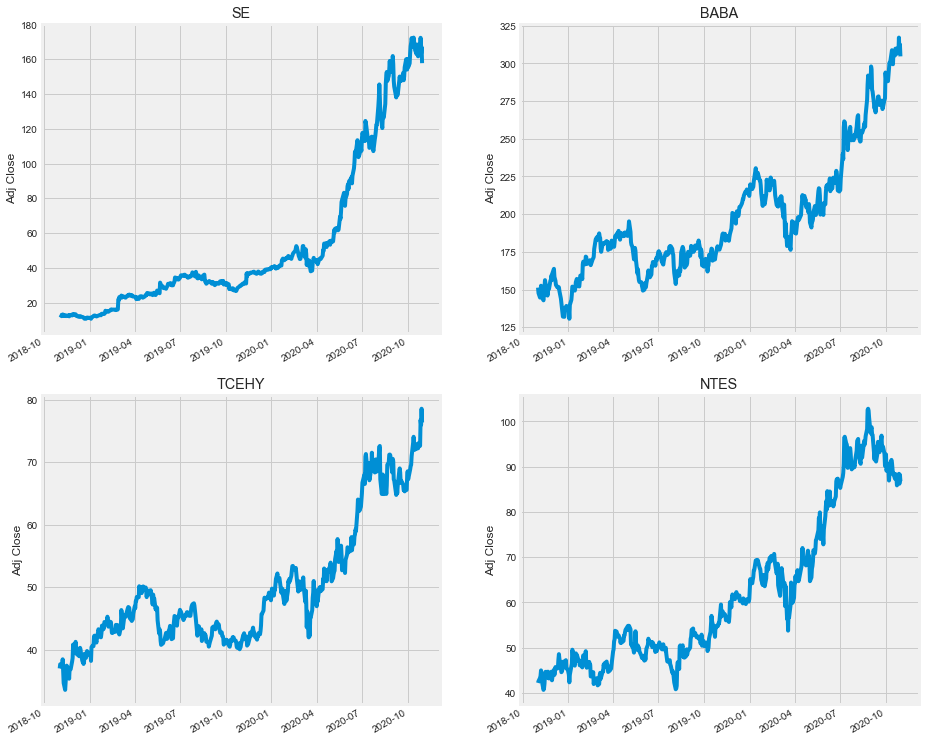

In [5]:
plt.figure(figsize=(14, 9))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

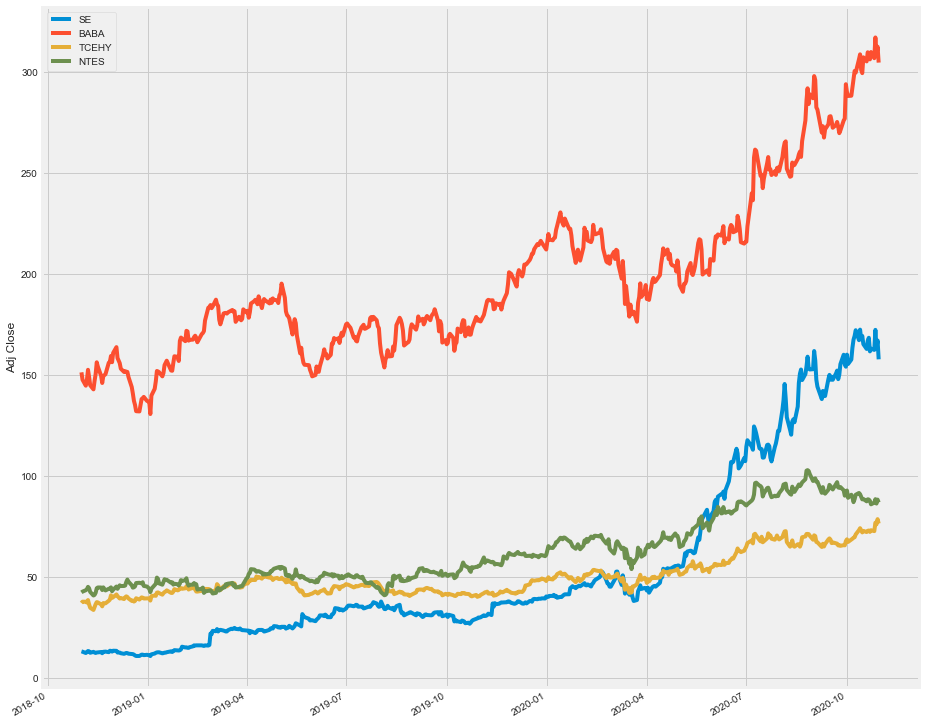

In [6]:
plt.figure(figsize=(14, 9))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.legend(tech_list)

## Total Volume traded 

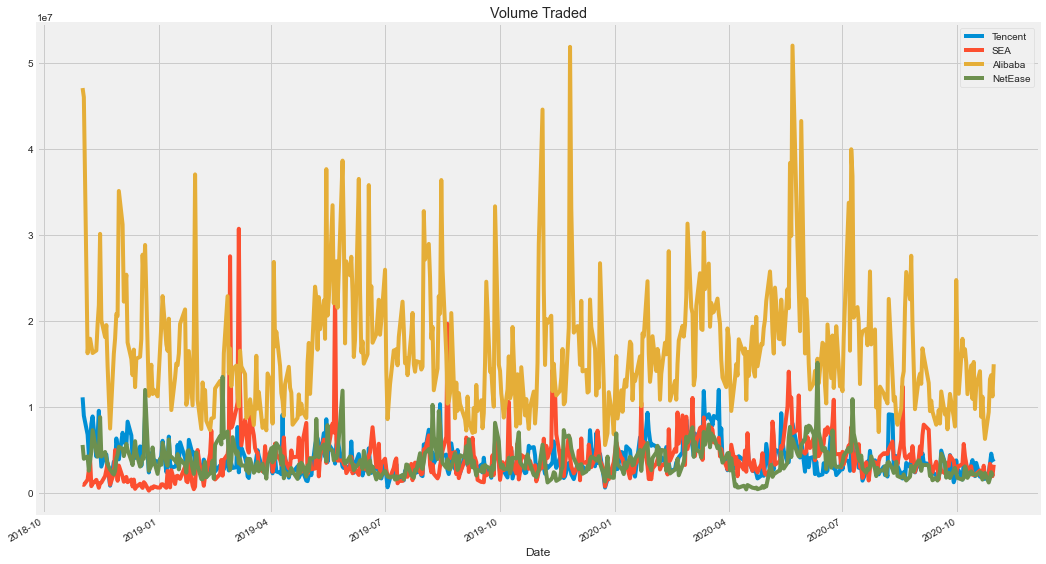

In [7]:
# Volume of each stock that was traded each day 
TCEHY['Volume'].plot(label = 'Tencent', figsize = (16,10), title = 'Volume Traded')
SE['Volume'].plot(label = 'SEA')
BABA['Volume'].plot(label = 'Alibaba')
NTES['Volume'].plot(label = 'NetEase')
plt.legend();

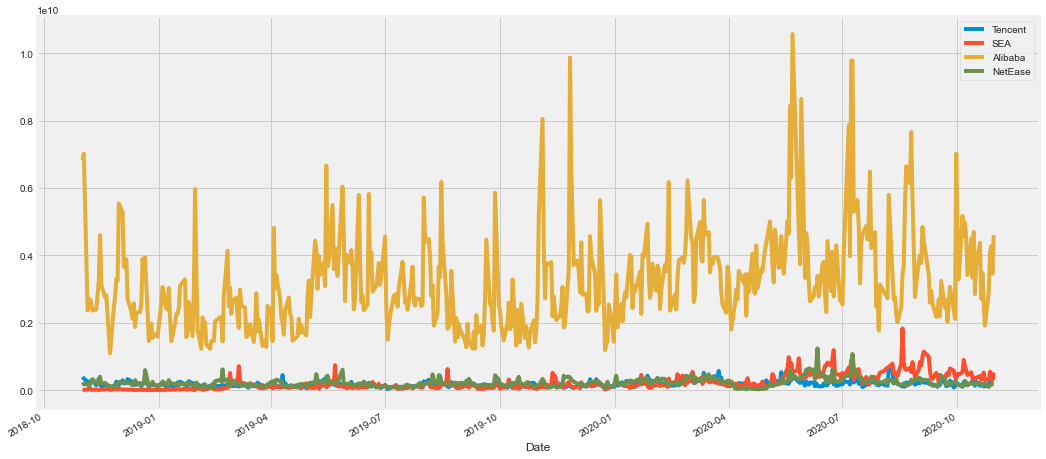

In [8]:
# Total volume that was traded 
TCEHY['Total Traded'] = TCEHY['Open']*TCEHY['Volume']
SE['Total Traded'] = SE['Open']*SE['Volume']
BABA['Total Traded'] = BABA['Open']*BABA['Volume']
NTES['Total Traded'] = NTES['Open']*NTES['Volume']

TCEHY['Total Traded'].plot(figsize = (16,8), label = 'Tencent')
SE['Total Traded'].plot(figsize = (16,8), label = 'SEA')
BABA['Total Traded'].plot(figsize = (16,8), label = 'Alibaba')
NTES['Total Traded'].plot(figsize = (16,8), label = 'NetEase')
plt.legend(loc = 'best');

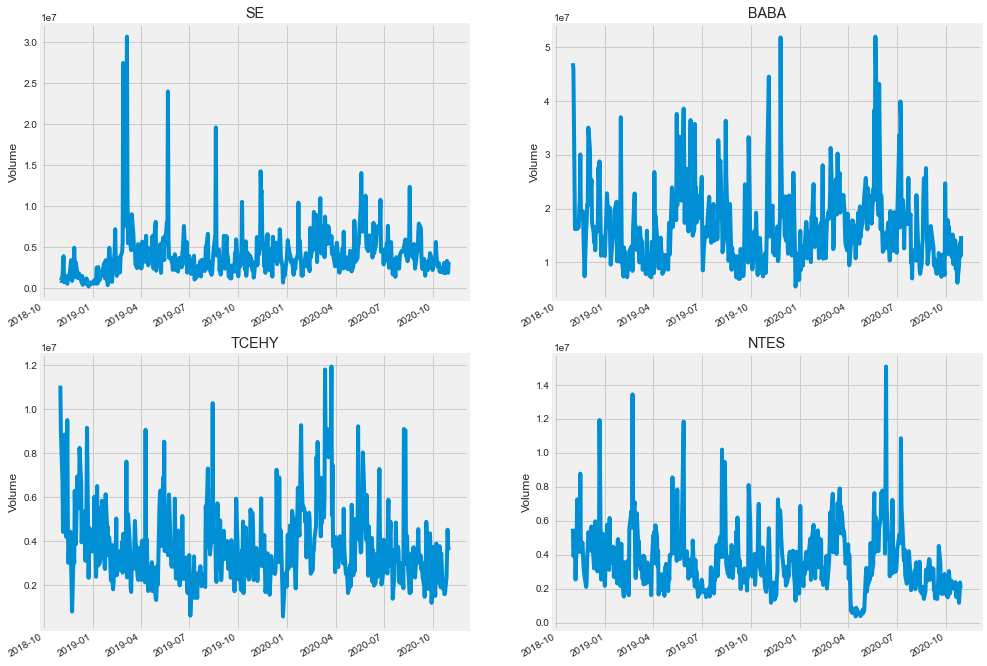

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## Moving Average returns
#### Moving Average (MA) is widely used in technical analysis to smooth out the price by taking out the "noise" from random short-term price changes. Since it is based on historical prices, it is a lagging or trend-following indicator.

In [10]:
# Moving average of the stock using 10, 20 and 50 days to smoothen out the price data through the creation of a constantly 
# updated average price. 

ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        


#### The first five histogram depicts the price (x-axis) against the frequency of occurrence (y-axis) for that corresponding price. The histograms are order accordingly: SEA, Alibaba, Tencent, NetEase. For example, SEA Limited adjusted close price had over 125 occurences out of 505 at approximately 175 USD. 
#### The last histogram depicts the trade volume (x-axis) against the frequency of occurence (y-axis) for that trade volume. For example, the x-axis is measured in 0.2 x 1e8 =20,000,000. 

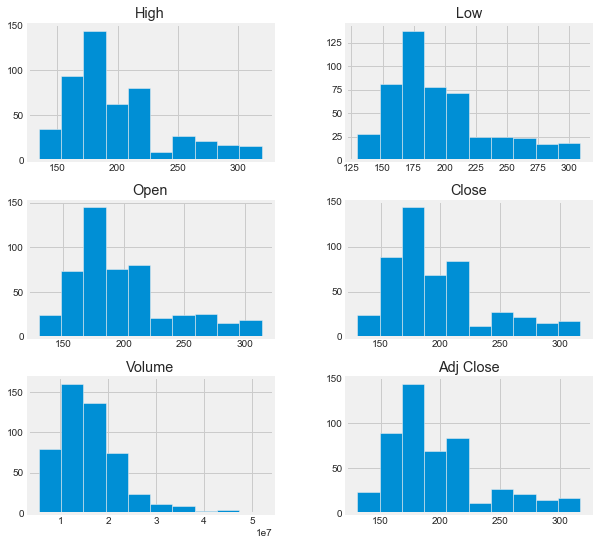

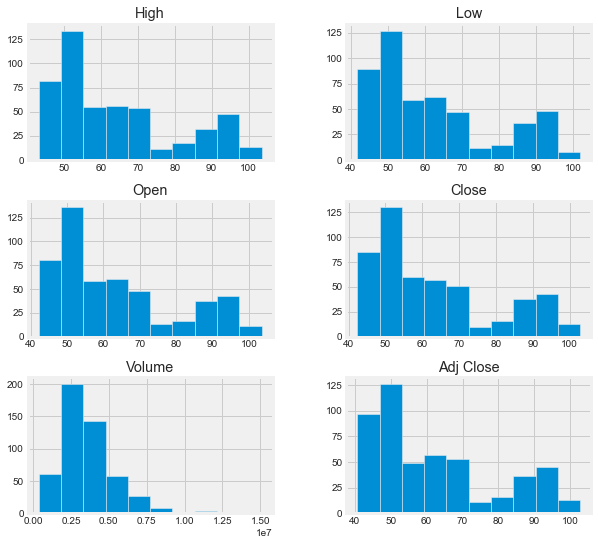

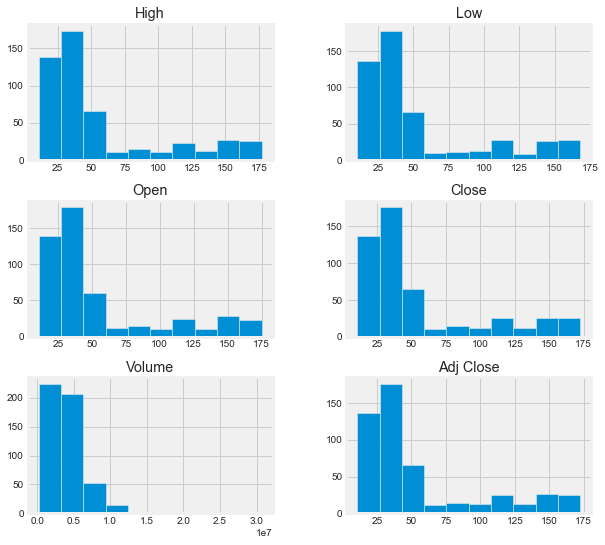

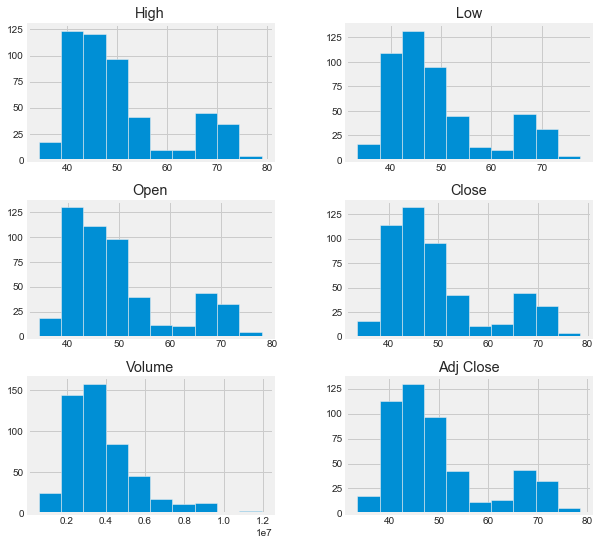

In [11]:
df.groupby("company_name").hist(figsize=(9, 9));

In [12]:
df.set_index(["company_name"])

,High,Low,Open,Close,Volume,Adj Close
company_name,,,,,,
SEA,13.190000,12.910000,13.130000,13.020000,932700.0,13.020000
SEA,13.000000,12.430000,13.000000,12.860000,889600.0,12.860000
SEA,12.920000,12.010000,12.820000,12.210000,1484700.0,12.210000
SEA,12.920000,12.120000,12.160000,12.650000,2621600.0,12.650000
SEA,13.390000,12.580000,12.780000,13.190000,3902400.0,13.190000
...,...,...,...,...,...,...
NTES,86.790001,85.169998,85.309998,86.709999,1164200.0,86.709999
NTES,89.070000,86.169998,87.160004,88.419998,1650100.0,88.419998
NTES,89.180000,85.959999,87.599998,86.239998,2363500.0,86.239998


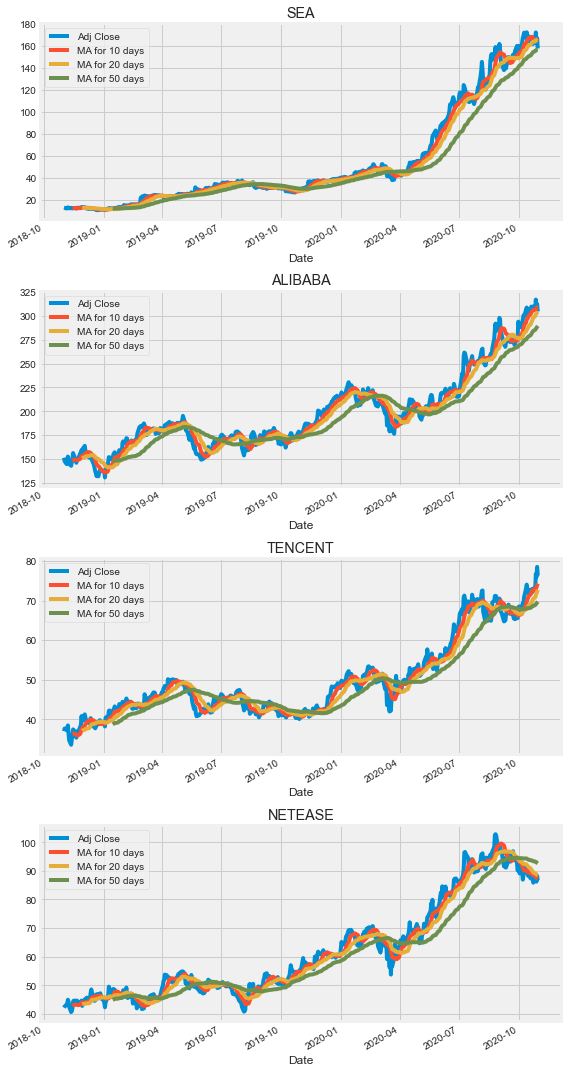

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_figheight(15)
fig.set_figwidth(8)

SE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0])
axes[0].set_title('SEA')

BABA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1])
axes[1].set_title('ALIBABA')

TCEHY[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[2])
axes[2].set_title('TENCENT')

NTES[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[3])
axes[3].set_title('NETEASE')


fig.tight_layout()

## Daily percent change and daily return 

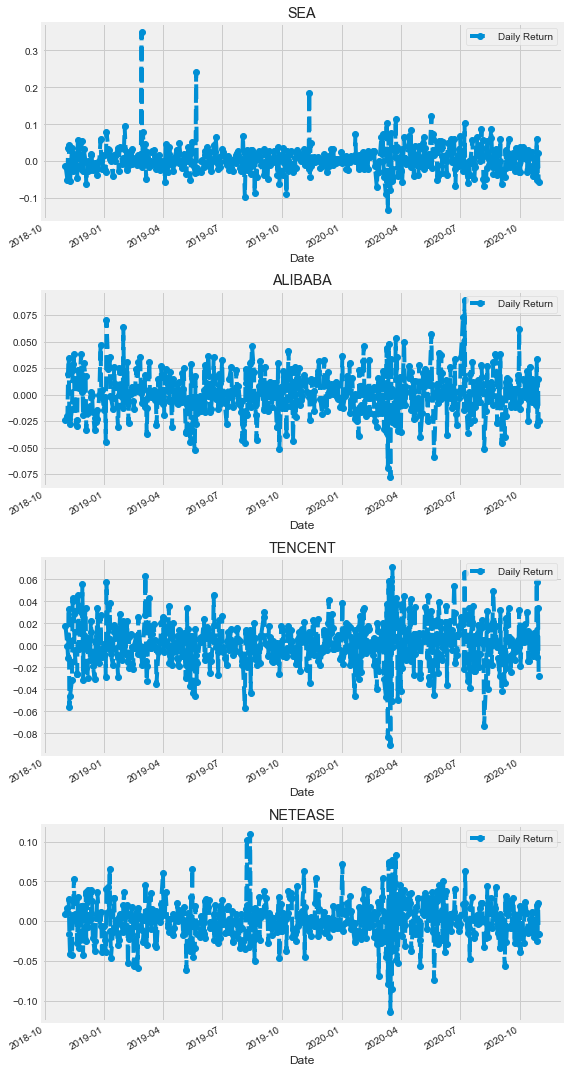

In [14]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_figheight(15)
fig.set_figwidth(8)

SE['Daily Return'].plot(ax=axes[0], legend=True, linestyle='--', marker='o')
axes[0].set_title('SEA')

BABA['Daily Return'].plot(ax=axes[1], legend=True, linestyle='--', marker='o')
axes[1].set_title('ALIBABA')

TCEHY['Daily Return'].plot(ax=axes[2], legend=True, linestyle='--', marker='o')
axes[2].set_title('TENCENT')

NTES['Daily Return'].plot(ax=axes[3], legend=True, linestyle='--', marker='o')
axes[3].set_title('NETEASE')


fig.tight_layout()

## Volatility and Risk
#### By looking at a daily percentage change, it can be concluded stock's volatility and how risky it is. The formula is simple: more volatility = more risk. The histogram shows the number of occurrence (y-axis) of each daily return (x-axis). 

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

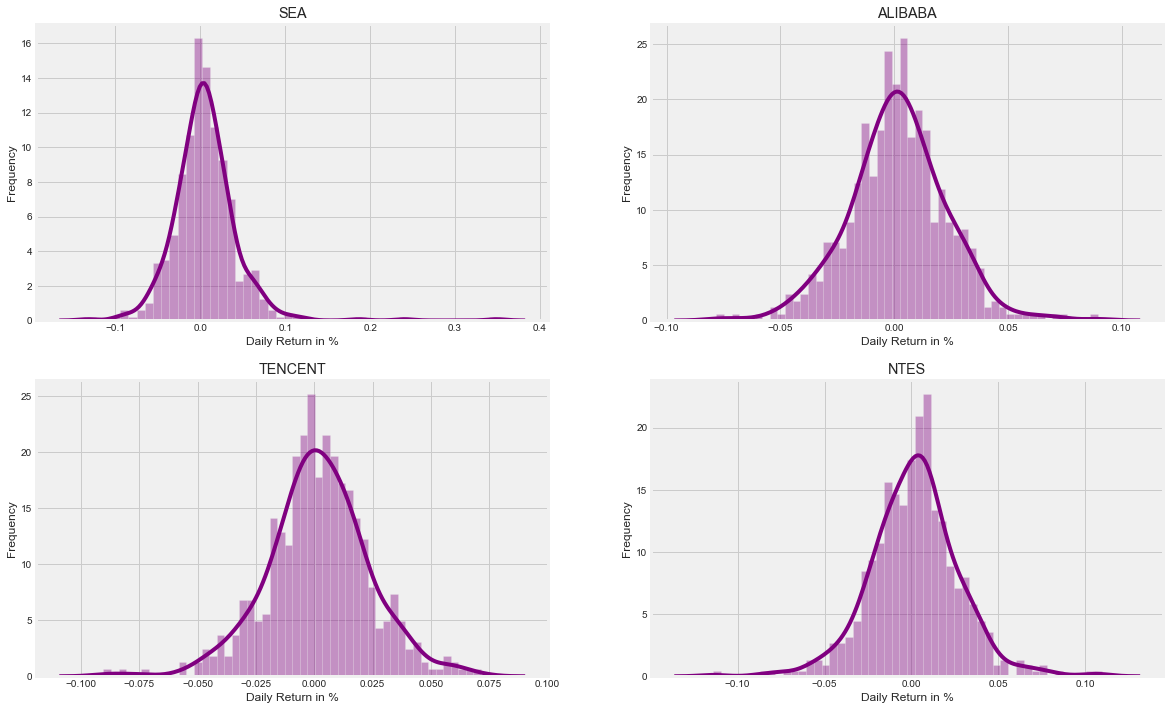

In [15]:
plt.figure(figsize=(18, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=50, color='purple')
    plt.ylabel('Frequency')
    plt.xlabel('Daily Return in %')
    plt.title(f'{company_name[i - 1]}')


In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,SE,BABA,TCEHY,NTES
Date,,,,
2018-11-01,13.02,151.250000,36.975616,42.232716
2018-11-02,12.86,147.589996,37.641930,42.623234
2018-11-05,12.21,144.639999,37.612099,43.318115
2018-11-06,12.65,147.440002,37.194408,43.767967
2018-11-07,13.19,152.500000,38.437534,44.995010


In [17]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,SE,BABA,TCEHY,NTES
Date,,,,
2018-11-01,NaN,NaN,NaN,NaN
2018-11-02,-0.012289,-0.024198,0.018020,0.009247
2018-11-05,-0.050544,-0.019988,-0.000792,0.016303
2018-11-06,0.036036,0.019358,-0.011105,0.010385
2018-11-07,0.042688,0.034319,0.033422,0.028035


C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


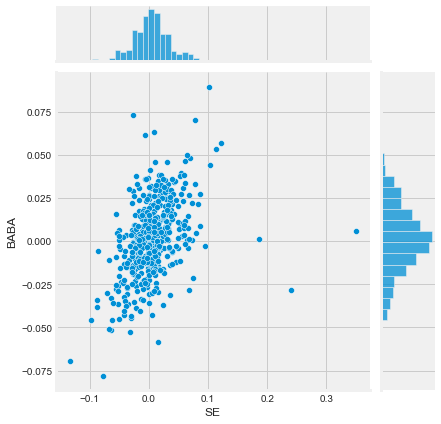

In [18]:
sns.jointplot('SE', 'BABA', tech_rets, kind='scatter')

C:\Users\Asus\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


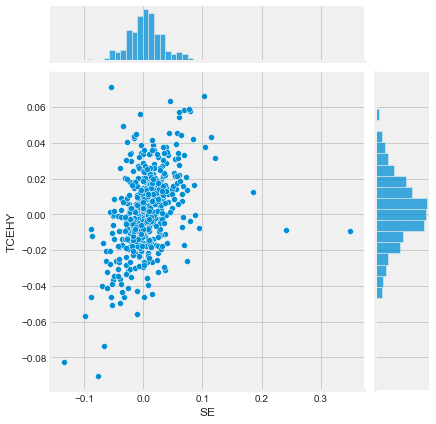

In [19]:
sns.jointplot('SE', 'TCEHY', tech_rets, kind='scatter')

## Correlation

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

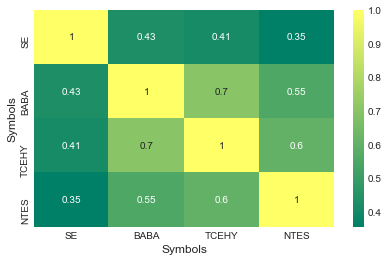

In [20]:
# Use seaborn for a quick correlation plot for the daily returns

sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

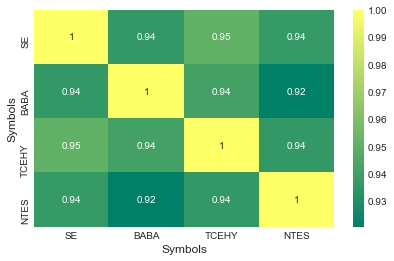

In [21]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')


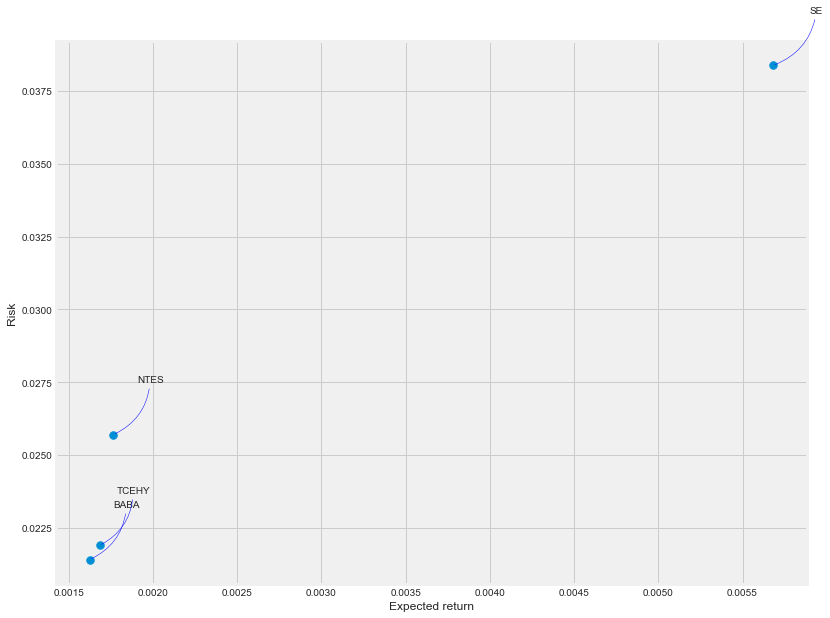

In [22]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

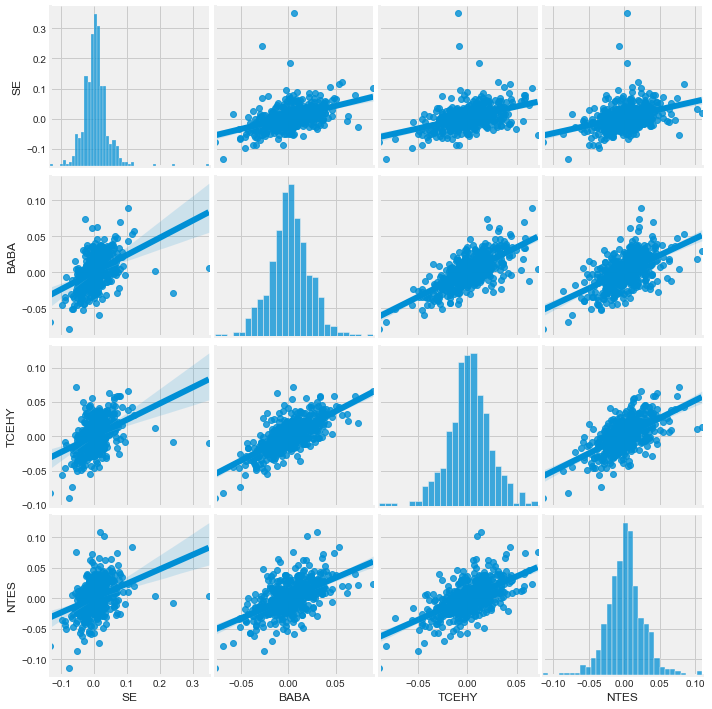

In [23]:
sns.pairplot(tech_rets, kind='reg')